## Formatting Order Statistics for Win Condition Games
#### Formats CSV data from specific game's history to be uploaded to the database
#### Select a time window, a game, disselect In-Store Pickup and Cancelled Orders
#### Adjust the filename
#### Formats and Saves the Order number,Order Date,Order Type (Direct),Product Amt,Shipping Amt,Shipping Type

In [2]:
import csv
import pandas as pd
from mysql.connector import connection

In [9]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#put filename here---------------------------------------------------------------------------------------------------
tcgfilename= 'yugioh.csv'
#put filename here---------------------------------------------------------------------------------------------------


#converting the csv data to a pandas dataframe for altering order dates and column names
frame = pd.read_csv(tcgfilename)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
newcolumns = {'Order #':'order_number','Order Date':'order_date','Product Amt':'product_amt','Shipping Amt':'shipping_amt','Shipping Type':'shipping_type'}
formaldates = []
ordertype = []
i = 0
#adjusting the dates
for date in frame['Order Date']:
    #Slicing the year
    year = date[-4:]
    #slicing the date
    day = date[-8:-6]
    day = day.replace(' ','0')
    #slicing the month
    for m in months:
        if m in date:
            month = months.index(m)+1
    if int(month) < 10:
        month = '0'+str(month)
    else:
        month = str(month)
    #putting it all together and adding it to a list
    formaldate = year+'-'+month+'-'+day
    formaldates.append(formaldate)

#rewriting the date column with newly formated dates
while i < frame.shape[0]:
    frame.at[i,'Order Date'] = formaldates[i]
    i += 1

#categorizing Direct and Non-Direct Orders
for status in frame['Status']:
    if 'Direct' in status:
        ordertype.append('Direct')
    else:
        ordertype.append('Store')
frame['order_type'] = ordertype

#rewriting the headers
frame.rename(columns=newcolumns,inplace=True)

#dropping unnecessary columns
frame = frame[['order_number','order_date','order_type','product_amt','shipping_amt','shipping_type']]

#printing sample rows for troubleshooting before writing the new file
#print(frame)


#put filename here-------------------------------------------------------------------------------------------------------------------
for index, row in frame.iterrows():
    cursor.execute("INSERT INTO yugioh_order_history_v2 (order_number,order_date,order_type,product_amt,shipping_amt,shipping_type) VALUES (%s,%s,%s,%s,%s,%s)", (row.order_number, row.order_date, row.order_type,row.product_amt,row.shipping_amt,row.shipping_type))
cnx.commit()
cursor.close()
#put filename here-------------------------------------------------------------------------------------------------------------------

#Clearing the data
formaldates.clear()
ordertype.clear()
frame = frame[0:0]

print('complete')

complete


## Formatting Front Sales over a single Month

In [130]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()
#converting the csv data to a pandas dataframe for altering order dates and column names
frame = pd.read_csv('front_orders.csv')

#reformating columns
frame = frame[['Order Number','Purchased At','Total','Customer Email']]
newcolumns = {'Order Number':'order_id','Purchased At':'order_date','Total':'total','Customer Email':'customer_email'}
frame.rename(columns=newcolumns,inplace=True)

#-----------EDIT CATEGORY--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Magic Pokemon Yugioh Supplies Vanguard Collectibles Event Snack Weiss ModelKits VideoGames RPGs Dice DragonBall Media MiscTCG Digimon HighPokemon Warhammer Graded MetaZoo LocalArtist OnePiece
frame['category'] = ['OnePiece']*frame.shape[0]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#adjusting the dates
months = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
dates = []
for date in frame['order_date']:
    m = months[date[3:6]]
    y = date[7:11]
    d = date[:2]
    dates.append(y+'-'+m+'-'+d)
i = 0
while i < frame.shape[0]:
    frame.at[i,'order_date'] = dates[i]
    i += 1

for index, row in frame.iterrows():
    if not row.customer_email == row.customer_email:
        row.customer_email = None
    else:
        row.customer_email = row.customer_email[:40]
    cursor.execute("INSERT INTO front_order_history_v2 (order_id,customer_email,total,order_date,category) VALUES (%s,%s,%s,%s,%s)", (row.order_id, row.customer_email, row.total,row.order_date,row.category))
cnx.commit()
cursor.close()

#Clearing the data
formaldates.clear()
ordertype.clear()
frame = frame[0:0]

print('complete')

complete


## Formatting Inputting Statistics for Win Condition Games
#### Formats CSV data from specific inputer during a time window for a particular game
#### Select a time window, a game, and an account
#### Adjust the file name and the inputter name before running
#### Formats and Saves the 'game','set_name','product','condition','printing','date','name','input_amt','prices'

In [34]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='wincoinputting')
cursor = cnx.cursor()

#put filename here
tcgfilename= 'input.csv'
#converting the csv data to a pandas dataframe for altering order dates and column names
#frame = pd.concat([pd.read_csv(tcgfilename),pd.read_csv(tcgfilename2)],ignore_index = True)
frame = pd.read_csv(tcgfilename)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
newcolumns = {'TCGplayerId':'id','Set Name':'set_name','Product Line':'game','User':'user','Date':'input_date','Product Name':'product','Printing':'printing','Condition':'condition_type'}
#rewriting the headers
frame.rename(columns=newcolumns,inplace=True)
formaldates = []
drop = []
prices = []
i = 0
month = 0
for date in frame['input_date']:
    #Slicing the year
    date = date[:date.find(' ')]
    year = date[-4:]
    #slicing the date
    day = date[-7:-5]
    day = day.replace('/','0')
    #slicing the month
    month = date[:date.find('/')]
    if int(month)<10:
        month = '0'+month
    #putting it all together and adding it to a list
    formaldate = year+'-'+month+'-'+day
    formaldates.append(formaldate)
#rewriting the date column with newly formated dates
while i < frame.shape[0]:
    frame.at[i,'input_date'] = formaldates[i]
    i += 1
formaldates.clear()
i = 0

for index, row in frame.iterrows():
    if len(row.set_name) > 50:
        #print(row.set_name)
        frame.loc[index, 'set_name'] = row.set_name[:49]
    if len(row['product']) > 49:
        frame.loc[index, 'product'] = row['product'][:49]
    if row.Property == 'Quantity':
        if pd.isna(frame).iloc[index]['OriginalValue']:
            formaldates.append(int(row['UpdatedValue']-0))
            found = frame.where(frame['id'] == row['id'])
            found = found.where(found['condition_type'] == row['condition_type'])
            found = found.where(found['printing'] == row['printing'])
            found = found.where(found['Property'] == 'Price')
            found = found.UpdatedValue
            found = found.dropna()
            if len(found) > 1:
                price = found.max()
                prices.append(price)
            elif len(found) == 1:
                prices.append(found.iloc[0])
            else:
                prices.append(None)
        elif row['UpdatedValue']-row['OriginalValue'] < 0:
            drop.append(index)
        else:
            formaldates.append(int(row['UpdatedValue']-row['OriginalValue']))
            found = frame.where(frame['id'] == row['id'])
            found = found.where(found['condition_type'] == row['condition_type'])
            found = found.where(found['printing'] == row['printing'])
            found = found.where(found['Property'] == 'Price')
            found = found.UpdatedValue
            found = found.dropna()
            if len(found) > 1:
                price = found.max()
                prices.append(price)
            elif len(found) == 1:
                prices.append(found.iloc[0])
            else:
                prices.append(None)

#dropping unnecessary columns and rows
frame = frame.drop(index = drop)
frame = frame[frame['Property'] == 'Quantity']

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#adding columns
name = ['Rainy'] * len(formaldates)
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

frame['employee_name'] = name
frame['price'] = prices
frame['input_amt'] = formaldates
frame = frame.reset_index()
frame = frame.fillna(0)
#dropping unnecessary columns
frame = frame[['game','set_name','product','condition_type','printing','input_date','employee_name','input_amt','price']]

#printing sample rows for troubleshooting before writing the new file
#print(frame)

for index, row in frame.iterrows():
    cursor.execute("INSERT INTO inputting_history (game,set_name,product,condition_type,printing,input_date,employee_name,input_amt,price) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)", (row.game,row.set_name,row['product'],row.condition_type,row.printing,row.input_date,row.employee_name,row.input_amt,row.price))
cnx.commit()
cursor.close()

#writing the new file
frame.to_csv('formatted '+tcgfilename,index=False)
formaldates.clear()
drop.clear()
name.clear()
frame = frame[0:0]
print('complete')

complete


## Visualizing Order Statistics for Win Condition Games Over a Quarter
#### Creates graphs for visualizing basic trends in sales data
#### Adjust the months list to select range
#### Adjust the Graph Title and plot save name

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from mysql.connector import connection
import pandas as pd

   product_amt
0      2067.73
   product_amt
0      21413.0
   product_amt
0      1434.56
   product_amt
0     15745.75
   product_amt
0      1009.78
   product_amt
0      28572.0


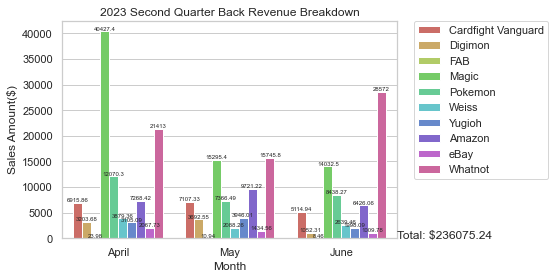

In [18]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the months to examine for the quarter
months = [(4,2023),(5,2023),(6,2023)]

#Arrays for holding aggregate data
nm = []
gm = []
df = pd.DataFrame(columns=['Month'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#iterating through the months for analysis
for y in months:
    #getting the vanguard order amounts
    data = pd.read_sql("SELECT product_amt FROM vanguard_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Cardfight Vanguard']*len(data)
    #getting the digimon order amounts
    data = pd.read_sql("SELECT product_amt FROM digimon_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Digimon']*len(data)
    #getting the fab order amounts
    data = pd.read_sql("SELECT product_amt FROM fab_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['FAB']*len(data)
    #getting the magic order amounts
    data = pd.read_sql("SELECT product_amt FROM magic_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Magic']*len(data)
    #getting the pokemon order amounts
    data = pd.read_sql("SELECT product_amt FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Pokemon']*len(data)
    #getting the weiss order amounts
    data = pd.read_sql("SELECT product_amt FROM weiss_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Weiss']*len(data)
    #getting the yugioh order amounts
    data = pd.read_sql("SELECT product_amt FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Yugioh']*len(data)
    #getting the shadowverse order amounts
    data = pd.read_sql("SELECT product_amt FROM shadowverse_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Shadowverse']*len(data)
    #getting the amazon order amounts
    data = pd.read_sql("SELECT total_sales as product_amt FROM amazon_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Amazon']*len(data)
    #getting the ebay order amounts
    data = pd.read_sql("SELECT total_sales as product_amt FROM ebay_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    print(data)
    gm = gm + ['eBay']*len(data)
    #getting the ebay order amounts
    data = pd.read_sql("SELECT total_sales as product_amt FROM whatnot_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=y)
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    print(data)
    gm = gm + ['Whatnot']*len(data)
    df['Game']=gm
    df['Month']=nm
    df['Game']=gm

s = 0
cs = 0
for k in df['Game'].unique():
    t = df[df['Game']==k]['product_amt'].sum()
    cs += t
    if t > s:
        s = t
cs = round(cs,2)
    
sns.set_theme(style="whitegrid")
df.rename(columns = {'product_amt':'Sales Amount($)'}, inplace=True)
#df = df.sort_values('Game')

ax = sns.barplot(x = 'Month',
            y = 'Sales Amount($)',
            data = df,
            hue='Game',
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')

dts = 'Total: $'+str(cs)
ax.text(2.5,0,dts)

for i in ax.containers:
    ax.bar_label(i,fontsize=6)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title='2023 Second Quarter Back Revenue Breakdown')
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\2023 Second Quarter Back Revenue Comparisons',dpi=800,bbox_inches='tight')
plt.show()

#### This Cell Creates a Graph to compare total sale value vs RI sale value for each game over a quarter

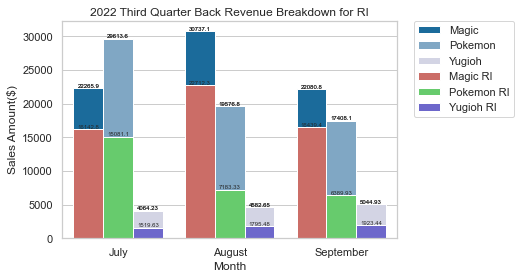

In [34]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the months to examine for the quarter
months = [(7,),(8,),(9,)]

#Arrays for holding aggregate data
nm = []
gm = []
df = pd.DataFrame(columns=['Month'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#iterating through the months for analysis
for y in months:
    #getting the magic order amounts
    data = pd.read_sql("SELECT product_amt,order_type FROM magic_order_history_v2 WHERE MONTH(order_date) = %s", cnx,params=[y[0]])
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Magic']*len(data)
    #getting the pokemon order amounts
    data = pd.read_sql("SELECT product_amt,order_type FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s", cnx,params=[y[0]])
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Pokemon']*len(data)
    #getting the yugioh order amounts
    data = pd.read_sql("SELECT product_amt,order_type FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s", cnx,params=[y[0]])
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
    gm = gm + ['Yugioh']*len(data)
df['Month']=nm
df['Game']=gm

sns.set_theme(style="whitegrid")
df.rename(columns = {'product_amt':'Sales Amount($)'}, inplace=True)
df = df.sort_values('Game')
ax = sns.barplot(x = 'Month',
            y = 'Sales Amount($)',
            data = df,
            hue='Game',
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='PuBu_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
df['Game'] = df['Game']+' RI'
ax = sns.barplot(x = 'Month',
            y = 'Sales Amount($)',
            data = df.loc[df['order_type']=='Direct'],
            hue='Game',
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title='2022 Third Quarter Back Revenue Breakdown for RI')
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\2022 Third Quarter Back RI Revenue Comparisons for RI',dpi=800,bbox_inches='tight')
plt.show()

#### This cell shows the total cards inputted per game over a quarter

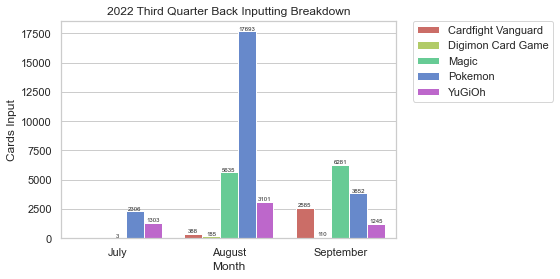

In [35]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='wincoinputting')
cursor = cnx.cursor()

#setting the months to examine for the quarter
months = [(7,),(8,),(9,)]

#Arrays for holding aggregate data
nm = []
gm = []
df = pd.DataFrame(columns=['Month'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#iterating through the months for analysis
for y in months:
    #getting the magic order amounts
    data = pd.read_sql("SELECT game,input_amt,input_date FROM inputting_history WHERE MONTH(input_date) = %s", cnx,params=[y[0]])
    df = pd.concat([df,data],ignore_index=True)
    nm = nm + [monthnames[y[0]-1]]*len(data)
df['Month']=nm

sns.set_theme(style="whitegrid")
df.rename(columns = {'input_amt':'Cards Input','game':'Game'}, inplace=True)
df = df.sort_values('input_date')
hue_order=['Cardfight Vanguard','Digimon Card Game','Magic','Pokemon','YuGiOh']
ax = sns.barplot(x = 'Month',
            y = 'Cards Input',
            data = df,
            hue='Game',
            hue_order=hue_order,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title='2022 Third Quarter Back Inputting Breakdown')
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\2022 Third Quarter Back Inputting Comparisons',dpi=800,bbox_inches='tight')
plt.show()

## Visualizing Order Statistics for Win Condition Games Over a Single Month
#### Creates graphs for visualizing basic trends in sales data
#### Adjust the month variable to select month
#### Adjust the Graph Title and plot save name

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from mysql.connector import connection
import pandas as pd

<BarContainer object of 11 artists>


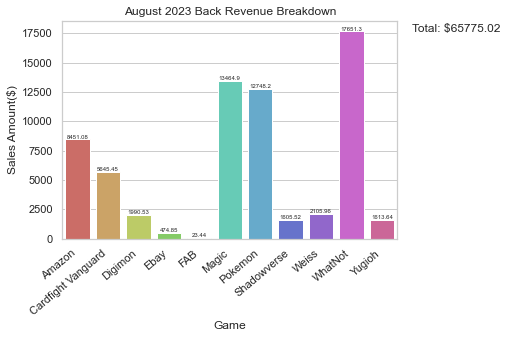

In [17]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the month and year to examine-----------------------------------------------------------
month = (8,2023)
#setting the month and year to examine-----------------------------------------------------------


#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']
df = pd.DataFrame(columns=['Game'])
gm = []
#getting the magic order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM magic_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Magic']*len(data)
#getting the pokemon order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Pokemon']*len(data)
#getting the weiss order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM weiss_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Weiss']*len(data)
#getting the yugioh order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh']*len(data)
#getting the fab order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM fab_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['FAB']*len(data)
#getting the digimon order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM digimon_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Digimon']*len(data)
#getting the vanguard order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM vanguard_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Cardfight Vanguard']*len(data)
#getting the shadowverse order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM shadowverse_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Shadowverse']*len(data)
#getting the amazon order amounts
data = pd.read_sql("SELECT total_sales as product_amt,orders as order_type FROM amazon_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Amazon']*len(data)
#getting the ebay order amounts
data = pd.read_sql("SELECT total_sales as product_amt,orders as order_type FROM ebay_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Ebay']*len(data)
#getting the whatnot order amounts
data = pd.read_sql("SELECT total_sales as product_amt FROM whatnot_sales_history WHERE MONTH(month_id) = %s AND YEAR(month_id) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['WhatNot']*len(data)
df['Game']=gm

s = 0
cs = 0
for k in df['Game'].unique():
    t = df[df['Game']==k]['product_amt'].sum()
    cs += t
    if t > s:
        s = t
cs = round(cs,2)
sns.set_theme(style="whitegrid")
df.rename(columns = {'product_amt':'Sales Amount($)'}, inplace=True)
df = df.sort_values('Game')
ax = sns.barplot(x = 'Game',
            y = 'Sales Amount($)',
            data = df,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
dts = 'Total: $'+str(cs)
ax.text(11,s,dts)
for i in ax.containers:
    print(i)
    ax.bar_label(i,fontsize=6)
    

#setting the month and year to examine------------------------------------------------------------------------------------------------
ax.set(title='August 2023 Back Revenue Breakdown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\August 2023 Back Revenue Comparisons',dpi=800,bbox_inches='tight')
#setting the month and year to examine------------------------------------------------------------------------------------------------

plt.show()

### Single Month Front Revenue Breakdown
#### Important note: custom line items seem to be not included in data

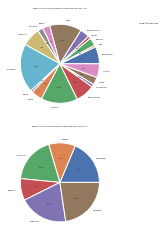

'data.rename(columns = {\'total\':\'Sales Amount($)\',\'category\':\'Category\'}, inplace=True)\nsns.set(font_scale = .8)\nax = sns.barplot(x = \'Category\',\n            y = \'Sales Amount($)\',\n            data = data,\n            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value\n            ci=None,\n            palette=\'hls\')\nd = data.drop_duplicates(subset=\'order_id\')\ntotal_sum = round(sum(d[\'Sales Amount($)\']),2)\ndts = \'Total: $\'+str(total_sum)\nax.text(23,0,dts)\nfor i in ax.containers:\n    print(i)\n    ax.bar_label(i,fontsize=6)\nax.set(title=\'March 2023 Front Revenue Breakdown (No Duplicates)\') # No Duplicates Duplicates Included\nax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")\nplt.savefig(\'C:\\Users\\winco\\Win Con Data Analysis\\March 2023 Front Revenue Comparisons (No Duplicates)\',dpi=800,bbox_inches=\'tight\')\nplt.show()'

In [121]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the month and year to examine
month = (3,2023)
#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']
#exploring the data
data = pd.read_sql("SELECT total,order_id,order_date,category FROM front_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)

#comment out to to keep duplicates------------------------
#data = data.drop_duplicates(subset='order_id')
#---------------------------------------------------------

sns.set_theme(style="whitegrid")
data = data.sort_values('category')

little_totals = pd.DataFrame({'category':[], 'total':[]})
totals = data.groupby(by='category')['total'].sum()
data = data.drop_duplicates(subset='order_id')
gt = round(sum(data.groupby(by='category')['total'].sum()),2)
for c, i in list(totals.items()):
    if i <= gt*.01:
        little_totals.loc[len(little_totals.index)] = [c,i] 
        del totals[c]

sns.set(font_scale = .2)
plt.subplot(2,1,1)
colors = sns.color_palette('pastel')[0:5]
plt.pie(totals, labels=totals.keys(),autopct='%.0f%%')
plt.title('March 2023 Front Revenue Comparisons Over %1')
plt.text(0+2, 1, "Total: $"+str(gt), horizontalalignment='left', size='medium', color='black')


plt.subplot(2,1,2)
plt.pie(little_totals.total, labels=little_totals.category,autopct='%.0f%%')
plt.title('March 2023 Front Revenue Comparisons Under %1')
#plt.text(0+1, 1, "Total: $"+str(gt), horizontalalignment='left', size='medium', color='black')

plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\March 2023 Front Revenue Comparisons Pie Chart',dpi=800,bbox_inches='tight')
plt.show()



'''data.rename(columns = {'total':'Sales Amount($)','category':'Category'}, inplace=True)
sns.set(font_scale = .8)
ax = sns.barplot(x = 'Category',
            y = 'Sales Amount($)',
            data = data,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
d = data.drop_duplicates(subset='order_id')
total_sum = round(sum(d['Sales Amount($)']),2)
dts = 'Total: $'+str(total_sum)
ax.text(23,0,dts)
for i in ax.containers:
    print(i)
    ax.bar_label(i,fontsize=6)
ax.set(title='March 2023 Front Revenue Breakdown (No Duplicates)') # No Duplicates Duplicates Included
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\March 2023 Front Revenue Comparisons (No Duplicates)',dpi=800,bbox_inches='tight')
plt.show()'''

#### Single Month RI Revenue Breakdown

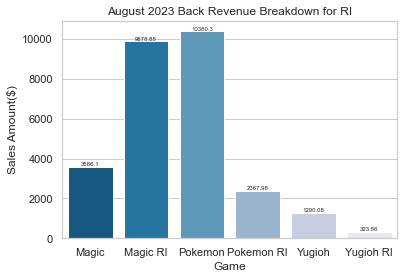

In [50]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the month and year to examine-----------------------------------------------------------
month = (8,2023)
#setting the month and year to examine-----------------------------------------------------------

gm = []
df = pd.DataFrame(columns=['Game'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#getting the magic order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM magic_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Magic']*len(data)
#getting the magic RI order amounts 
data = pd.read_sql("SELECT product_amt,order_type FROM magic_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Magic RI']*len(data)
#getting the pokemon order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Pokemon']*len(data)
#getting the pokmeon RI order amounts 
data = pd.read_sql("SELECT product_amt,order_type FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Pokemon RI']*len(data)


'''#getting the yugioh order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh']*len(data)'''

data = pd.read_sql("SELECT product_amt,order_type FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh']*len(data)
#getting the magic RI order amounts 
data = pd.read_sql("SELECT product_amt,order_type FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh RI']*len(data)

df['Game']=gm
df = df.sort_values('Game')
sns.set_theme(style="whitegrid")
df.rename(columns = {'product_amt':'Sales Amount($)'}, inplace=True)
ax = sns.barplot(x = 'Game',
            y = 'Sales Amount($)',
            data = df,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='PuBu_r')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
#setting the month and year to examine---------------------------------------------------------------------------------------------------------------
ax.set(title='August 2023 Back Revenue Breakdown for RI')
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\August 2023 Back Revenue Comparisons for RI',dpi=800,bbox_inches='tight')
#setting the month and year to examine---------------------------------------------------------------------------------------------------------------
plt.show()

#### Single Month General Revenue Breakdown

Index(['Game', 'COUNT(*)', 'product_amt', 'order_type'], dtype='object')


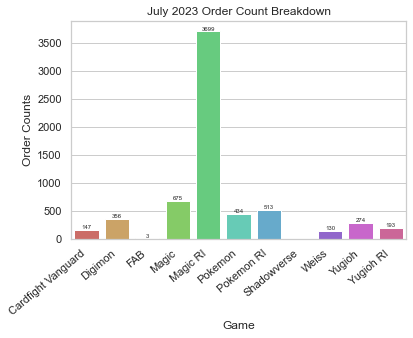

In [6]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the month to examine---------------------------------------------------------------------
month = (7,2023)
#setting the month to examine---------------------------------------------------------------------


#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']
df = pd.DataFrame(columns=['Game'])
gm = []
#getting the magic order amounts
data = pd.read_sql("SELECT COUNT(*) FROM magic_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Magic']
#getting the magic RI order amounts 
data = pd.read_sql("SELECT COUNT(*) FROM magic_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Magic RI']
#getting the pokemon order amounts
data = pd.read_sql("SELECT COUNT(*) FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Pokemon']
#getting the pokemon RI order amounts
data = pd.read_sql("SELECT COUNT(*) FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Pokemon RI']
#getting the weiss order amounts
data = pd.read_sql("SELECT COUNT(*) FROM weiss_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Weiss']
#getting the yugioh order amounts
data = pd.read_sql("SELECT COUNT(*) FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh']
#getting the yugioh RI order amounts
data = pd.read_sql("SELECT COUNT(*) FROM yugioh_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Direct' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Yugioh RI']
#getting the vanguard order amounts
data = pd.read_sql("SELECT COUNT(*) FROM vanguard_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Cardfight Vanguard']
#getting the shadowverse order amounts
data = pd.read_sql("SELECT product_amt,order_type FROM shadowverse_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Shadowverse']*len(data)
#getting the fab order amounts
data = pd.read_sql("SELECT COUNT(*) FROM fab_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['FAB']
#getting the digimon order amounts
data = pd.read_sql("SELECT COUNT(*) FROM digimon_order_history_v2 WHERE MONTH(order_date) = %s and order_type = 'Store' AND YEAR(order_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)
gm = gm + ['Digimon']

df['Game']=gm
print(df.keys())
sns.set_theme(style="whitegrid")
df.rename(columns = {'COUNT(*)':'Order Counts'}, inplace=True)
df = df.sort_values('Game')
ax = sns.barplot(x = 'Game',
            y = 'Order Counts',
            data = df,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

ax.set(title='July 2023 Order Count Breakdown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\July 2023 Order Count Comparisons',dpi=800,bbox_inches='tight')
plt.show()

### Inputting Overall Breakdown for a single Month

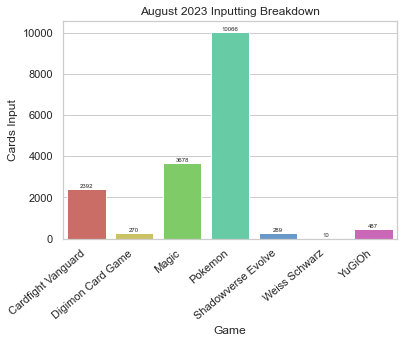

In [49]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='wincoinputting')
cursor = cnx.cursor()

#setting the month to examine
month = (8,2023)

#Arrays for holding aggregate data
gm = []
df = pd.DataFrame(columns=['Month'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Getting the inputting numbers
data = pd.read_sql("SELECT game,input_amt,input_date FROM inputting_history WHERE MONTH(input_date) = %s AND YEAR(input_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)

sns.set_theme(style="whitegrid")
df.rename(columns = {'input_amt':'Cards Input','game':'Game'}, inplace=True)
df = df.sort_values('Game')
hue_order=['Cardfight Vanguard','Digimon Card Game','Magic','Pokemon','YuGiOh']
ax = sns.barplot(x = 'Game',
            y = 'Cards Input',
            data = df,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
ax.set(title='August 2023 Inputting Breakdown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\August 2023 Inputting Comparisons',dpi=800,bbox_inches='tight')
plt.show()

### Inputting Overall Breakdown for a single Month

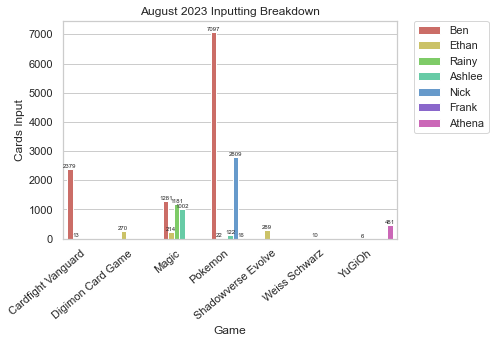

In [48]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='wincoinputting')
cursor = cnx.cursor()

#setting the month to examine
month = (8,2023)

#Arrays for holding aggregate data
gm = []
df = pd.DataFrame(columns=['Month'])

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Getting the inputting numbers
data = pd.read_sql("SELECT game,input_amt,input_date,employee_name FROM inputting_history WHERE MONTH(input_date) = %s AND YEAR(input_date) = %s", cnx,params=month)
df = pd.concat([df,data],ignore_index=True)

sns.set_theme(style="whitegrid")
df.rename(columns = {'input_amt':'Cards Input','game':'Game'}, inplace=True)
df = df.sort_values('Game')
hue_order=['Cardfight Vanguard','Digimon Card Game','Magic','Pokemon','YuGiOh']
'''ax = sns.barplot(x = 'Game',
            y = 'Cards Input',
            data = df,
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')'''
hue_order = df.employee_name.unique()
ax = sns.barplot(x = 'Game',
            y = 'Cards Input',
            data = df,
            hue='employee_name',
            estimator=sum, #change sum to len to see the count of orders, or mean for avg order value
            ci=None,
            palette='hls')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title='August 2023 Inputting Breakdown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('C:\\Users\\winco\\Win Con Data Analysis\\August 2023 Person Inputting Comparisons',dpi=800,bbox_inches='tight')
plt.show()

#### Single Month Weekly Revenue Breakdown

In [13]:
#connecting to the database and creating a cursor for querying
cnx = connection.MySQLConnection(user='root',password='AquaB0ttl3!',host='localhost',database='winconorders')
cursor = cnx.cursor()

#setting the month to examine
month = (8,2023)

#Month names for legibility
monthnames = ['January','February','March','April','May','June','July','August','September','October','November','December']
gm = []

#getting the magic order amounts
data = pd.read_sql("SELECT product_amt,order_date FROM magic_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
magic_orders = data
magic_orders['order_date'] = pd.to_datetime(magic_orders['order_date']) - pd.to_timedelta(7,unit='d')
magic_orders = magic_orders.groupby([pd.Grouper(key='order_date', freq='W-SUN')])['product_amt'].sum().reset_index().sort_values('order_date')
#getting the pokemon order amounts
data = pd.read_sql("SELECT product_amt,order_date FROM pokemon_order_history_v2 WHERE MONTH(order_date) = %s AND YEAR(order_date) = %s", cnx,params=month)
pokemon_orders = data
pokemon_orders['order_date'] = pd.to_datetime(pokemon_orders['order_date']) - pd.to_timedelta(7,unit='d')
pokemon_orders = pokemon_orders.groupby([pd.Grouper(key='order_date', freq='W-SUN')])['product_amt'].sum().reset_index().sort_values('order_date')
print(magic_orders)
print(pokemon_orders)

  order_date  product_amt
0 2023-07-30      2303.87
1 2023-08-06      4095.96
2 2023-08-13      1422.14
3 2023-08-20      3396.07
4 2023-08-27      2246.91
  order_date  product_amt
0 2023-07-30      1038.83
1 2023-08-06      2332.71
2 2023-08-13      2372.34
3 2023-08-20      2251.41
4 2023-08-27      4752.96
